In [6]:
from skimage import io
from matplotlib import pyplot as plt
from glob import glob
import numpy as np

['doumanoglou/test/03/rgb/0003.png' 'hinterstoisser/test/02/rgb/1114.png']


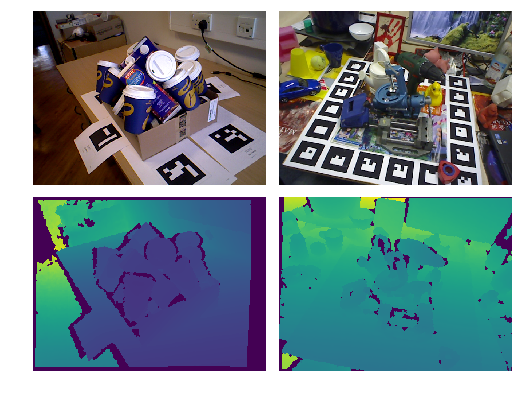

In [72]:
dou_test = np.array(sorted(glob('doumanoglou/test/*/rgb/*.png')))
hin_test = np.array(sorted(glob('hinterstoisser/test/*/rgb/*.png')))

dous = [119]
hins = [2350]
imgs = np.concatenate((dou_test[dous], hin_test[hins]))
N = len(imgs)

r = 640 / 480

plt.figure(figsize=(5*r, 5))
for i, image_path in enumerate(imgs):
    rgb = io.imread(image_path)
    depth = io.imread(image_path.replace('rgb', 'depth'))
    mi, ma = np.min(depth), np.max(depth)
    depth = (((depth - mi)/(ma-mi)) * 255).astype(np.uint8)
    io.imsave("depth_gray_{}.png".format(i), depth)
    plt.subplot(2, N, i + 1)
    plt.imshow(rgb)
    plt.axis('off')
    plt.subplot(2, N, i + 1 + N)
    plt.imshow(depth)
    plt.axis('off')
    
plt.subplots_adjust(0, 0, 1, 1, 0.05, 0.05*r)
print(imgs)

['doumanoglou/train/01/rgb/0170.png' 'doumanoglou/train/01/rgb/0475.png'
 'doumanoglou/train/01/rgb/2300.png' 'doumanoglou/train/02/rgb/0169.png'
 'doumanoglou/train/02/rgb/0474.png' 'doumanoglou/train/02/rgb/2299.png']


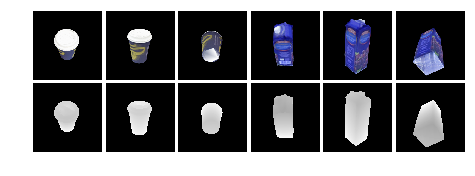

In [139]:
dou_train = np.array(sorted(glob('doumanoglou/train/*/rgb/*.png')))
dous = np.array([170, 475, 2300])
imgs = dou_train[np.concatenate((dous, 2376 + dous))]
N = len(imgs)

r = 3
c = ((80, -80), (160, -160))

plt.figure(figsize=(6, 1.96))
for i, image_path in enumerate(imgs):
    rgb = io.imread(image_path)
    depth = io.imread(image_path.replace('rgb', 'depth'))
    mi, ma = np.min(depth), np.max(depth)
    depth = (((depth - mi)/(ma-mi)) * 255).astype(np.uint8)
    depth = depth[c[0][0]:c[0][1], c[1][0]:c[1][1]]
    rgb = rgb[c[0][0]:c[0][1], c[1][0]:c[1][1]]
    plt.subplot(2, N, i + 1)
    plt.imshow(rgb)
    plt.axis('off')
    plt.subplot(2, N, i + 1 + N)
    plt.imshow(depth, cmap='gray')
    plt.axis('off')
    
plt.subplots_adjust(0, 0, 1, 1, 0.05, 0.05)
plt.savefig("dou_train_images.png", dpi=200)
print(imgs)